In [1]:
import numpy as np
import pandas as pd
try:
    from skmisc.loess import loess
except ImportError:
      from util import loess  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [2]:
data = pd.read_csv('data.csv', header=None)
X, y = data.iloc[:, 0], data.iloc[:, 1]
X = np.array(X)
y = np.array(y)

Now we can plot the data. 

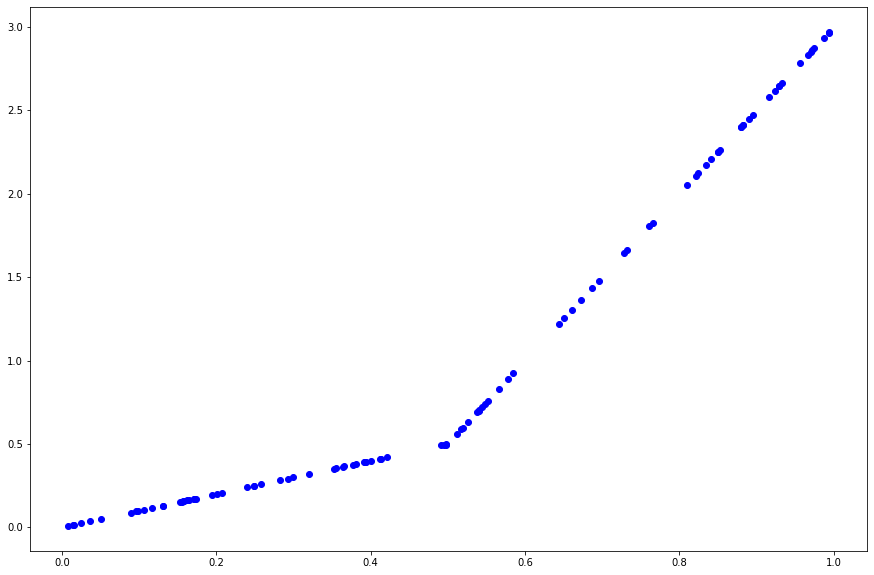

In [3]:
plt.scatter(X, y, c='b')

Now we can define the kernels $K_1,...,K_4$

In [4]:
def K1(x, x_):
    return 1

def K2(x, x_, lam):
    return (1 - np.abs((x-x_)/lam)**3)**3

def K3(x, x_, lam):
    return np.exp(-lam*np.abs(x-x_)**2)

def K4(x, x_, L):
    if type(L) != int:
        raise TypeError('L needs to be an integer.')
    for l in range(1, L+1):
        if ((l-1)/L <= x < l/L) and((l-1)/L <= x_ < l/L):
            return 1
    return 0

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [5]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    W = pairwise_kernels(X.reshape(-1, 1), metric=K)
    y_hat = []
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    for i, x0 in enumerate(X):
        lo = loess(X, y, weights=W[i, :])
        try:
            y0_hat = lo.predict([x0]).values
        except AttributeError:
            y0_hat = lo.predict([x0])
        y_hat.append(y0_hat)
    y_hat = np.array(y_hat)
    return y_hat

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the loess model for each of them.

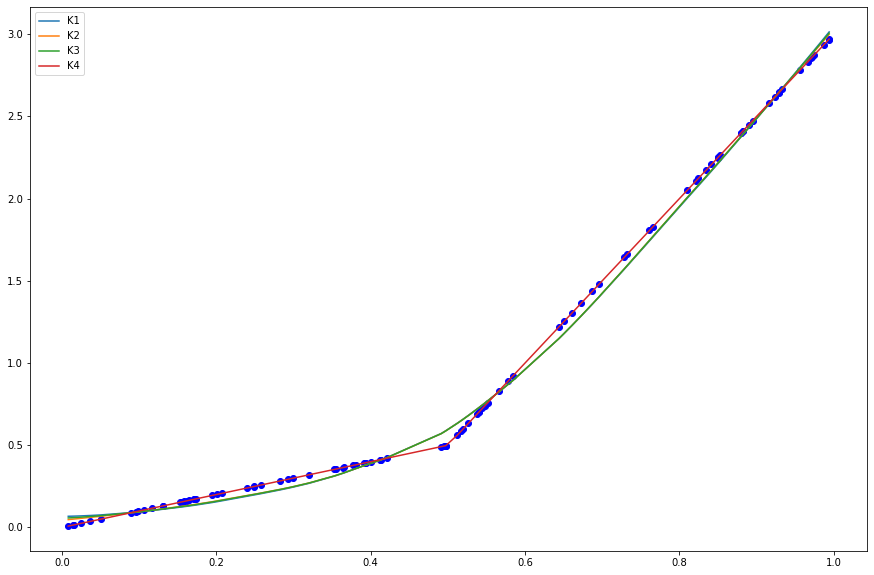

In [6]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, y, c='b')
for kernel in [K1, K2, K3, K4]:
    if kernel in [K2, K3]:
        K = partial(kernel, lam=1)
    elif kernel == K4:
        K = partial(kernel, L=2)
    else:
        K = kernel
    y_hat = pred(X, y, K)
    plt.plot(X, y_hat, label=kernel.__name__)
plt.legend()

We see that the model fit by using $K_4$ is best, which is not a big surprise, as the kernel captures precisely the underlying structure of the data.